In [1]:
# Path setup
import sys
import os

%matplotlib inline

sys.path.append(os.path.dirname(os.path.join(os.getcwd(), "../src")))

In [2]:
from src import utils

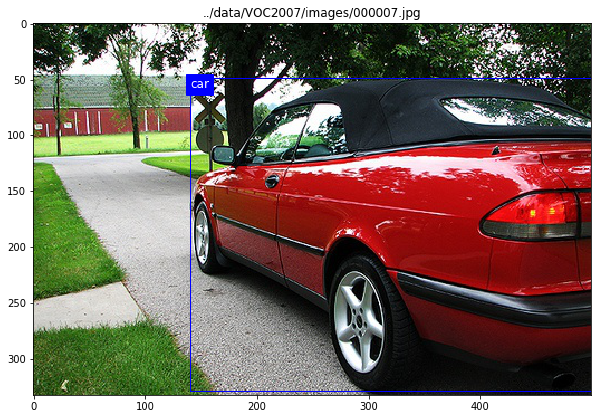

In [3]:
utils.visualize_label("../data/VOC2007/images/000007.jpg", "../data/VOC2007/labels/000007.txt")